In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [3]:
#modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Importing Csv data

In [4]:
df=pd.read_csv('Clean_Dataset.csv')

In [5]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Preparing X and y variable

In [6]:
X = df.drop(columns=['price'],axis=1)

In [7]:
X.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [8]:
y=df['price']

In [9]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [10]:
#creating column transformer with tree types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(300153, 1599)

In [13]:
#seperate data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((240122, 1599), (60031, 1599))

#### Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6141.1336
- Mean Absolute Error: 4231.6110
- R2 Score: 0.9268
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6167.7116
- Mean Absolute Error: 4230.6644
- R2 Score: 0.9262


Lasso
Model performance for Training set
- Root Mean Squared Error: 6258.0052
- Mean Absolute Error: 4326.1190
- R2 Score: 0.9240
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6272.3199
- Mean Absolute Error: 4316.4794
- R2 Score: 0.9237


Ridge
Model performance for Training set
- Root Mean Squared Error: 6144.4309
- Mean Absolute Error: 4234.8504
- R2 Score: 0.9267
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6171.1150
- Mean Absolute Error: 4235.2357
- R2 Score: 0.9261


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2370.8773
- Mean Absolute Error: 1013.2191


Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.990995
4,Decision Tree,0.986246
3,K-Neighbors Regressor,0.982106
7,CatBoosting Regressor,0.981511
6,XGBRegressor,0.978780
0,Linear Regression,0.926204
2,Ridge,0.926122
1,Lasso,0.923679
8,AdaBoost Regressor,0.905564


Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("accuracy of the model is %.2f" %score)

accuracy of the model is 92.62


In [31]:
random_forest_regressor_model = RandomForestRegressor(n_estimators=100)
random_forest_regressor_model = random_forest_regressor_model.fit(X_train,y_train)
y_pred = random_forest_regressor_model.predict(X_test)
score = r2_score(y_test, y_pred)*100



In [32]:
print("accuracy of the model is %.2f" %score)

accuracy of the model is 99.09


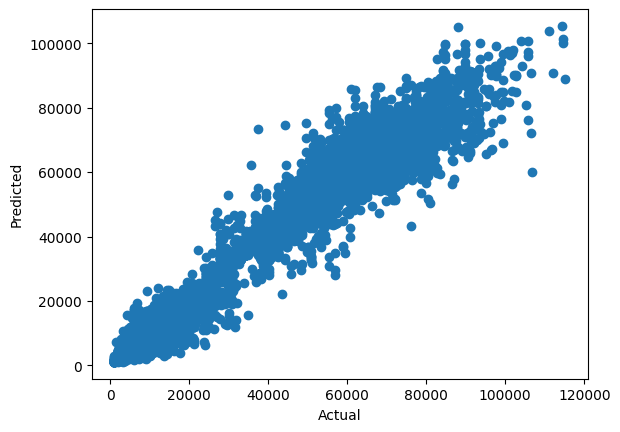

In [33]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


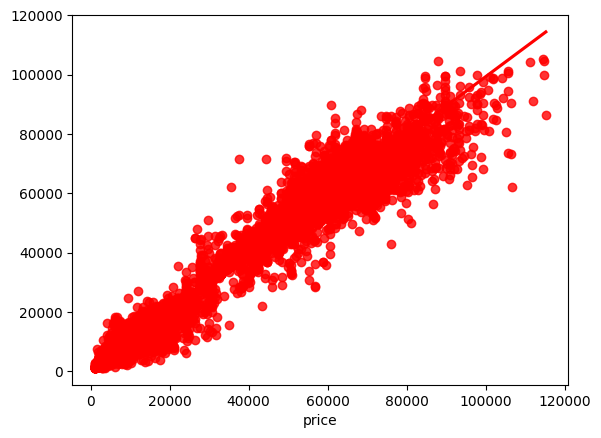

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [34]:
#difference between actual and Predicted Values
df_pred=pd.DataFrame({'Actual Prices':y_test,'Predicted prices':y_pred,'Difference':y_test-y_pred})

In [35]:
df_pred.shape

(60031, 3)

In [36]:
df_pred.head(20)

,Actual Prices,Predicted prices,Difference
27131,7366,7192.68,173.32
266857,64831,68576.06,-3745.06
141228,6195,6195.00,0.00
288329,60160,60416.67,-256.67
97334,6578,6586.74,-8.74
135931,4555,6104.30,-1549.30
290630,23838,23838.00,0.00
141944,3860,3860.00,0.00
244517,32230,43553.33,-11323.33
215903,76841,67663.17,9177.83
